# Decision Tree classifier

### Today your task is to get familiar with decision tree classifier - simple, but powerful case of discrete math usage.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### General idea
#### You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.


#### Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775
- https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173
- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
- https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

#### Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Dataset
#### You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set
#### However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.
P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Finally, it is your turn to write such classifier by yourself!

###  Gini impurity

Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$

In [1]:
class Node:

    def __init__(self, X, y, gini):
        self.X = X
        self.y = y
        self.gini = gini
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


In [2]:
# Implement a decision tree classifier
from collections import Counter
from math import log2, sqrt, ceil
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


class MyDecisionTreeClassifier:

    def __init__(self, max_depth=3, min_data_for_split=5):
        self.max_depth = max_depth
        self.min_data_for_split = min_data_for_split

    def gini(self, groups, classes):
        '''
        A Gini score gives an idea of how good a split is by how mixed the
        classes are in the two groups created by the split.

        A perfect separation results in a Gini score of 0,
        whereas the worst case split that results in 50/50
        classes in each group result in a Gini score of 0.5
        (for a 2 class problem).
        '''
        total = sum((len(group) for group in groups))
        gini = 0
        for i, group in enumerate(groups):
            if len(group):
                gini += len(group)/total*(1 -
                                          sum((
                                              value**2 for value in Counter(classes[i]).values()))/len(group)**2)
        return gini

    def split_data(self, X, y) -> tuple[int, int]:
        '''
        test all the possible splits in O(N*F) where N in number of samples
        and F is number of features
        return index and threshold value
        '''
        gini = 1
        index = None
        threshold = None
        for i in range(len(X[0])):
            for j in range(len(X)):
                left_X = []
                right_X = []
                left_y = []
                right_y = []
                for k, element in enumerate(X):
                    if element[i] >= X[j][i]:
                        right_X.append(element)
                        right_y.append(y[k])
                    else:
                        left_X.append(element)
                        left_y.append(y[k])
                if left_X and right_X and self.gini((left_X, right_X), (left_y, right_y)) < gini:
                    gini = self.gini((left_X, right_X), (left_y, right_y))
                    index = i
                    threshold = X[j][i]
        if index and threshold:
            return (index, threshold)
        else:
            return None

    def build_tree(self, X, y, depth=0):
        node = Node(
            X=X,
            y=y,
            gini=self.gini((X,), (y,))
        )
        if depth < self.max_depth and len(X) > self.min_data_for_split:
            if split := self.split_data(X, y):
                index, threshold = split
                left_X = []
                right_X = []
                left_y = []
                right_y = []
                for k, element in enumerate(X):
                    if element[index] >= threshold:
                        right_X.append(element)
                        right_y.append(y[k])
                    else:
                        left_X.append(element)
                        left_y.append(y[k])
                node.gini = self.gini((left_X, right_X), (left_y, right_y))
                node.feature_index = index
                node.threshold = threshold
                node.left = self.build_tree(left_X, left_y, depth + 1)
                node.right = self.build_tree(right_X, right_y, depth + 1)
        return node

    def fit(self, X, y):
        '''
        wrapper for build tree / train
        '''
        self.tree = self.build_tree(X, y)

    def predict(self, X_test):
        '''
        traverse the tree while there is a child
        and return the predicted class for it,
        note that X_test can be a single sample or a batch
        '''
        prediction = []
        for element in X_test:
            node = self.tree
            while node.left:
                if element[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            prediction.append(Counter(node.y).most_common()[0][0])
        return prediction

    def evaluate(self, X_test, y_test):
        '''
        return accuracy
        '''
        prediction = self.predict(X_test)
        return sum(prediction == y_test) / len(y_test)


Testing the tree:

In [3]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X, X_test, y, y_test = train_test_split(X, y, test_size=0.20)
clf = MyDecisionTreeClassifier()
clf.fit(X, y)
clf.evaluate(X_test, y_test)


0.9298245614035088

### Extra features

Hyperparameter fitting (takes a **very** long time):

In [4]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X, X_hyper_test, y, y_hyper_test = train_test_split(X, y, test_size=0.10)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.20)

clf = MyDecisionTreeClassifier()
clf.fit(X, y)
baseline_accuracy = clf.evaluate(X_test, y_test)
baseline_height = 3
baseline_min_data_for_split = 5
for i in range(ceil(log2(dataset.data.shape[0]))):
    for j in range(0, ceil(sqrt(dataset.data.shape[0])), 5):
        clf = MyDecisionTreeClassifier(
            max_depth=i, min_data_for_split=j)
        clf.fit(X, y)
        accuracy = clf.evaluate(X_test, y_test)
        if accuracy > baseline_accuracy:
            baseline_accuracy = accuracy
            baseline_height = i
            baseline_min_data_for_split = j


Testing if it works (compare the value from above)

In [5]:
clf = MyDecisionTreeClassifier()
clf.fit(X, y)
print('Baseline')
print('Training accuracy:', clf.evaluate(X, y))
print('Test accuracy:', clf.evaluate(X_test, y_test))
print('Hyper test accuracy:', clf.evaluate(X_hyper_test, y_hyper_test))
print('Optimal height: ', baseline_height)
print('Optimal minimum data for split:', baseline_min_data_for_split)
clf = MyDecisionTreeClassifier(
    max_depth=baseline_height,
    min_data_for_split=baseline_min_data_for_split)
clf.fit(X, y)
print('Training accuracy:', clf.evaluate(X, y))
print('Test accuracy:', clf.evaluate(X_test, y_test))
print('Hyper test accuracy:', clf.evaluate(X_hyper_test, y_hyper_test))


Baseline
Training accuracy: 0.960880195599022
Test accuracy: 0.9029126213592233
Hyper test accuracy: 0.9122807017543859
Optimal height:  7
Optimal minimum data for split: 0
Training accuracy: 0.9902200488997555
Test accuracy: 0.9320388349514563
Hyper test accuracy: 0.9298245614035088


Amusingly, under certain train/test splits the optimal hyper parameters are the same as the default, while under others the hyper parameter fitter hyperoverfits for the **test** dataset. 

Good thing we have a **second** testing dataset to check it against!

### Other quality measures:

Confusion matrix (shows true and false positives and negatives)

Train Confusion matrix


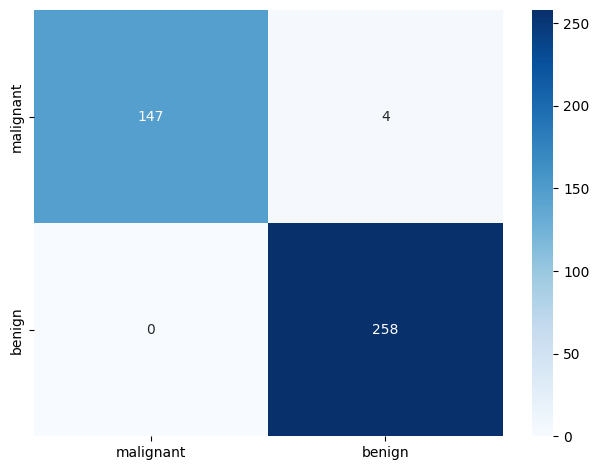

Test Confusion matrix


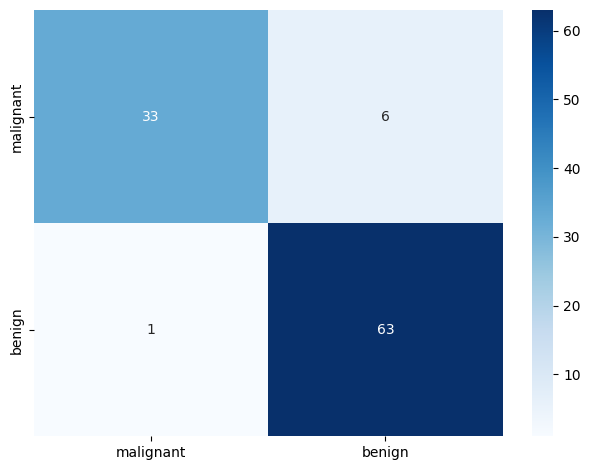

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusionmatrix(X, y, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_pred=clf.predict(X), y_true=y)
    sns.heatmap(cf, annot=True, yticklabels=dataset.target_names,
                xticklabels=dataset.target_names, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

plot_confusionmatrix(X, y, dom='Train')
plot_confusionmatrix(X_test, y_test, dom='Test')


Sensitivity (true positive rate, important because for cancer false negatives are much worse than false positives):

In [21]:
true_positives=0
false_negatives=0
prediction=clf.predict(X_test)
for i in range(len(prediction)):
    if prediction[i]==y_test[i] and prediction[i]==0:
        true_positives+=1
    if prediction[i]!=y_test[i] and prediction[i]==1:
        false_negatives+=1
print('Sensitivity: ', true_positives/(true_positives+false_negatives))

Sensitivity:  0.8461538461538461
